In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import ast
from sklearn.preprocessing import MultiLabelBinarizer, OrdinalEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from Preprossing import preprossing_the_test
import warnings
warnings.simplefilter('ignore')

In [2]:
# Load the dataset
data = pd.read_csv('movies-regression-dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(
    "vote_average", axis=1), data["vote_average"], test_size=0.20, random_state=42)
print(X_train.shape)
X_train.head()

(2431, 19)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,viewercount,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_count
210,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://disney.go.com/disneypictures/highschool...,11887,"[{""id"": 4344, ""name"": ""musical""}, {""id"": 6027,...",en,High School Musical 3: Senior Year,It's almost graduation day for high school sen...,21.801188,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/22/2008,0,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,High School Musical 3: Senior Year,821
781,0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",NaN,13768,[],en,Tuck Everlasting,Natalie Babbitt's award winning book for child...,4.115398,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10/11/2002,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"If you could choose to live forever, would you?",Tuck Everlasting,128
1127,270000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://www.superman.com,1452,"[{""id"": 83, ""name"": ""saving the world""}, {""id""...",en,Superman Returns,Superman returns to discover his 5-year absenc...,57.925623,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",6/28/2006,391081192,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,Superman Returns,1400
227,12000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,38223,"[{""id"": 470, ""name"": ""spy""}, {""id"": 1328, ""nam...",en,Harriet the Spy,When the secret notebook of a young girl who f...,4.630930,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/10/1996,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,On your case!,Harriet the Spy,46
365,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",NaN,24575,[],en,Raise the Titanic,"To obtain a supply of a rare mineral, a ship r...",1.630541,"[{""name"": ""ITC Entertainment"", ""id"": 1584}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",1/1/1980,0,115.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They've found the Titanic. There's just one th...,Raise the Titanic,21


In [24]:
print(X_train.isnull().sum())

budget                     0
genres                     0
homepage                1530
id                         0
keywords                   0
original_language          0
original_title             0
overview                   1
viewercount                0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    1
spoken_languages           0
status                     0
tagline                  299
title                      0
vote_count                 0
dtype: int64


In [25]:
X_train.drop(["homepage", "id", "title"], inplace=True, axis=1)
X_train["runtime"].fillna(X_train["runtime"].mean(), inplace=True)
X_train["overview"].fillna(" ", inplace=True)
X_train["tagline"].fillna(" ", inplace=True)
print(X_train.shape)
print(X_train.isnull().sum())


(2431, 16)
budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
viewercount             0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
vote_count              0
dtype: int64


In [26]:
X_train['year'] = pd.to_datetime(X_train['release_date']).dt.year
X_train['month'] = pd.to_datetime(X_train['release_date']).dt.month
X_train['day'] = pd.to_datetime(X_train['release_date']).dt.day

X_train.drop(['release_date'], axis=1, inplace=True)
print(X_train.shape)
X_train.head()


(2431, 18)


,budget,genres,keywords,original_language,original_title,overview,viewercount,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,vote_count,year,month,day
1166,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 18, ""nam...",[],en,Green Street Hooligans: Underground,An old firm leader returns to Green Street for...,5.000500,"[{""name"": ""Tea Shop & Film Company"", ""id"": 131...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,,33,2013,1,1
2926,12000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 2101, ""name"": ""garage""}, {""id"": 3568, ...",en,Lars and the Real Girl,Sometimes you find love where you'd least expe...,15.817096,"[{""name"": ""Sidney Kimmel Entertainment"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11293663,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The search for true love begins outside the box.,509,2007,10,12
298,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...","[{""id"": 933, ""name"": ""michigan""}, {""id"": 1228,...",en,The Virgin Suicides,A group of male friends become obsessed with f...,26.218912,"[{""name"": ""American Zoetrope"", ""id"": 70}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10409377,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Beautiful, mysterious, haunting, invariably fa...",817,1999,4,21
32,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",130431368,108.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,407,2006,7,14
1934,16000000,"[{""id"": 35, ""name"": ""Comedy""}]","[{""id"": 240, ""name"": ""underdog""}, {""id"": 2283,...",en,Not Another Teen Movie,"On a bet, a gridiron hero at John Hughes High ...",23.423082,"[{""name"": ""Original Film"", ""id"": 333}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",66468332,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They served you Breakfast. They gave you Pie. ...,431,2001,12,7


In [27]:
def convert_the_dict_to_values(data, feats):
    for feat in feats:
        data[feat] = data[feat].apply(lambda x: ast.literal_eval(x))
        data[feat] = [", ".join([d["name"] for d in lst])
                      for lst in data[feat]]
    return data


X_train = convert_the_dict_to_values(
    X_train, ("genres", "keywords", "production_companies", "production_countries", "spoken_languages"))
print(X_train.shape)
X_train.head()


(2431, 18)


,budget,genres,keywords,original_language,original_title,overview,viewercount,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,vote_count,year,month,day
1166,0,"Action, Drama",,en,Green Street Hooligans: Underground,An old firm leader returns to Green Street for...,5.000500,Tea Shop & Film Company,United States of America,0,90.0,English,Released,,33,2013,1,1
2926,12000000,"Comedy, Romance, Drama","garage, lone wolf, dying and death, loss, delu...",en,Lars and the Real Girl,Sometimes you find love where you'd least expe...,15.817096,"Sidney Kimmel Entertainment, Metro-Goldwyn-May...",United States of America,11293663,106.0,"English, Español",Released,The search for true love begins outside the box.,509,2007,10,12
298,6000000,"Drama, Romance","michigan, 1970s, youth, family, woman director",en,The Virgin Suicides,A group of male friends become obsessed with f...,26.218912,American Zoetrope,United States of America,10409377,97.0,English,Released,"Beautiful, mysterious, haunting, invariably fa...",817,1999,4,21
32,54000000,"Comedy, Romance","roommate, love of one's life, newlywed",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"Universal Pictures, Kaplan/Perrone Entertainme...",United States of America,130431368,108.0,English,Released,Two's company. Dupree's a crowd.,407,2006,7,14
1934,16000000,Comedy,"underdog, ball, kiss, high school, school part...",en,Not Another Teen Movie,"On a bet, a gridiron hero at John Hughes High ...",23.423082,"Original Film, Columbia Pictures Corporation, ...",United States of America,66468332,89.0,English,Released,They served you Breakfast. They gave you Pie. ...,431,2001,12,7


In [28]:
def one_hot_encoding(data, feat):
    mlb = MultiLabelBinarizer()
    new_feat = data[feat].astype(str).str.split(", ")
    mlb.fit(new_feat)
    
    filehandler = open(f"{feat}.obj", "wb")
    pickle.dump(mlb, filehandler)
    filehandler.close()
    
    new_feat = pd.DataFrame(mlb.transform(new_feat), columns=mlb.classes_)
    data = pd.concat([data.reset_index(drop=True),
                    new_feat.reset_index(drop=True)], axis=1)
    data.drop(feat, axis=1, inplace=True)
    return data


X_train = one_hot_encoding(X_train, "genres")
X_train = one_hot_encoding(X_train, "production_countries")
X_train = one_hot_encoding(X_train, "production_companies")
X_train = one_hot_encoding(X_train, "keywords")
X_train = one_hot_encoding(X_train, "spoken_languages")
print(X_train.shape)
X_train.head()


(2431, 9956)


,budget,original_language,original_title,overview,viewercount,revenue,runtime,status,tagline,vote_count,...,हिन्दी,বাংলা,ਪੰਜਾਬੀ,தமிழ்,ภาษาไทย,ქართული,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,en,Green Street Hooligans: Underground,An old firm leader returns to Green Street for...,5.000500,0,90.0,Released,,33,...,0,0,0,0,0,0,0,0,0,0
1,12000000,en,Lars and the Real Girl,Sometimes you find love where you'd least expe...,15.817096,11293663,106.0,Released,The search for true love begins outside the box.,509,...,0,0,0,0,0,0,0,0,0,0
2,6000000,en,The Virgin Suicides,A group of male friends become obsessed with f...,26.218912,10409377,97.0,Released,"Beautiful, mysterious, haunting, invariably fa...",817,...,0,0,0,0,0,0,0,0,0,0
3,54000000,en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,130431368,108.0,Released,Two's company. Dupree's a crowd.,407,...,0,0,0,0,0,0,0,0,0,0
4,16000000,en,Not Another Teen Movie,"On a bet, a gridiron hero at John Hughes High ...",23.423082,66468332,89.0,Released,They served you Breakfast. They gave you Pie. ...,431,...,0,0,0,0,0,0,0,0,0,0


In [29]:
droped = []
for c in X_train.columns:
    try:
        if X_train[c].sum() == 1:
            droped.append(c)
    except:
        if not c and c not in droped: # " "
            droped.append(c)

X_train.drop(droped, axis=1, inplace=True)

print(X_train.shape)
X_train.head()


(2431, 3850)


,budget,original_language,original_title,overview,viewercount,revenue,runtime,status,tagline,vote_count,...,اردو,العربية,فارسی,हिन्दी,ਪੰਜਾਬੀ,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,en,Green Street Hooligans: Underground,An old firm leader returns to Green Street for...,5.000500,0,90.0,Released,,33,...,0,0,0,0,0,0,0,0,0,0
1,12000000,en,Lars and the Real Girl,Sometimes you find love where you'd least expe...,15.817096,11293663,106.0,Released,The search for true love begins outside the box.,509,...,0,0,0,0,0,0,0,0,0,0
2,6000000,en,The Virgin Suicides,A group of male friends become obsessed with f...,26.218912,10409377,97.0,Released,"Beautiful, mysterious, haunting, invariably fa...",817,...,0,0,0,0,0,0,0,0,0,0
3,54000000,en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,130431368,108.0,Released,Two's company. Dupree's a crowd.,407,...,0,0,0,0,0,0,0,0,0,0
4,16000000,en,Not Another Teen Movie,"On a bet, a gridiron hero at John Hughes High ...",23.423082,66468332,89.0,Released,They served you Breakfast. They gave you Pie. ...,431,...,0,0,0,0,0,0,0,0,0,0


In [30]:
def Feature_Encoder(X, cols):
    enc = OrdinalEncoder()
    for c in cols:
        enc.fit(X[c].astype(str).values.reshape(-1, 1)) 
        
        filehandler = open(f"{c}.obj", "wb")
        pickle.dump(enc, filehandler)
        filehandler.close()
        
        X[c] = enc.transform(X[c].astype(str).values.reshape(-1, 1))
    return X

X_train = Feature_Encoder(X_train, ("original_language", "original_title", "status"))
print(X_train.shape)
X_train.head()


(2431, 3850)


,budget,original_language,original_title,overview,viewercount,revenue,runtime,status,tagline,vote_count,...,اردو,العربية,فارسی,हिन्दी,ਪੰਜਾਬੀ,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말
0,0,4.0,728.0,An old firm leader returns to Green Street for...,5.000500,0,90.0,1.0,,33,...,0,0,0,0,0,0,0,0,0,0
1,12000000,4.0,995.0,Sometimes you find love where you'd least expe...,15.817096,11293663,106.0,1.0,The search for true love begins outside the box.,509,...,0,0,0,0,0,0,0,0,0,0
2,6000000,4.0,2146.0,A group of male friends become obsessed with f...,26.218912,10409377,97.0,1.0,"Beautiful, mysterious, haunting, invariably fa...",817,...,0,0,0,0,0,0,0,0,0,0
3,54000000,4.0,2378.0,After standing in as best man for his longtime...,18.600367,130431368,108.0,1.0,Two's company. Dupree's a crowd.,407,...,0,0,0,0,0,0,0,0,0,0
4,16000000,4.0,1215.0,"On a bet, a gridiron hero at John Hughes High ...",23.423082,66468332,89.0,1.0,They served you Breakfast. They gave you Pie. ...,431,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def TF_IDF_encoder(X, cols):
    tfidf_vect = TfidfVectorizer(
        analyzer='word', min_df=0.1, stop_words="english", token_pattern=r'[a-zA-Z]{2,}')
    for c in cols:
        try:
            tfidf_vect.fit(X[c])
            
            filehandler = open(f"{c}.obj", "wb")
            pickle.dump(tfidf_vect, filehandler)
            filehandler.close()
            
            xtrain_tfidf = tfidf_vect.transform(X[c])
            new_feat = pd.DataFrame(
                xtrain_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
            X = pd.concat([X.reset_index(drop=True),
                          new_feat.reset_index(drop=True)], axis=1)
            X.drop(c, inplace=True, axis=1)
        except:
            print(f"not selected {c}")
            X.drop(c, inplace=True, axis=1)
    return X


X_train = TF_IDF_encoder(X_train, ("tagline", "overview"))
print(X_train.shape)
X_train.head()


not selected tagline
(2431, 3853)


,budget,original_language,original_title,viewercount,revenue,runtime,status,vote_count,year,month,...,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말,life,man,new,world,young
0,0,4.0,728.0,5.000500,0,90.0,1.0,33,2013,1,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,12000000,4.0,995.0,15.817096,11293663,106.0,1.0,509,2007,10,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,6000000,4.0,2146.0,26.218912,10409377,97.0,1.0,817,1999,4,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,54000000,4.0,2378.0,18.600367,130431368,108.0,1.0,407,2006,7,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,16000000,4.0,1215.0,23.423082,66468332,89.0,1.0,431,2001,12,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


# 4. Feature Selection

In [32]:
numeric_cols = ["budget", "viewercount", "revenue",
                "runtime", "vote_count", "year", "month", "day"]
categorical_cols = set(X_train.columns) - set(numeric_cols)
categorical_cols = list(categorical_cols)


In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train.loc[:,numeric_cols])

filehandler = open(f"scaling.obj", "wb")
pickle.dump(scaler, filehandler)
filehandler.close()

X_train.loc[:,numeric_cols] = scaler.transform(X_train.loc[:,numeric_cols])
print(X_train.shape)
X_train.head()

(2431, 3853)


,budget,original_language,original_title,viewercount,revenue,runtime,status,vote_count,year,month,...,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말,life,man,new,world,young
0,0.000000,4.0,728.0,0.006904,0.000000,0.266272,1.0,0.002400,0.966292,0.000000,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,0.042857,4.0,995.0,0.021839,0.004051,0.313609,1.0,0.037013,0.898876,0.818182,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,0.021429,4.0,2146.0,0.036201,0.003734,0.286982,1.0,0.059410,0.808989,0.272727,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0.192857,4.0,2378.0,0.025682,0.046784,0.319527,1.0,0.029596,0.887640,0.545455,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,0.057143,4.0,1215.0,0.032341,0.023841,0.263314,1.0,0.031341,0.831461,1.000000,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [34]:
from scipy.stats import pearsonr
correlations = {}
for feature in numeric_cols:
    correlation, _ = pearsonr(X_train[feature], y_train)
    if abs(correlation) < 0.35: # drop numeric columns with low person correlation values
        X_train.drop(feature, axis=1, inplace=True)
print(X_train.shape)
X_train.head()


(2431, 3847)


,original_language,original_title,runtime,status,vote_count,Action,Adventure,Animation,Comedy,Crime,...,ภาษาไทย,广州话 / 廣州話,日本語,普通话,한국어/조선말,life,man,new,world,young
0,4.0,728.0,0.266272,1.0,0.002400,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0
1,4.0,995.0,0.313609,1.0,0.037013,0,0,0,1,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
2,4.0,2146.0,0.286982,1.0,0.059410,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,4.0,2378.0,0.319527,1.0,0.029596,0,0,0,1,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
4,4.0,1215.0,0.263314,1.0,0.031341,0,0,0,1,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [35]:
_, p_values = f_regression(X_train.loc[:, categorical_cols], y_train) # ANOVA test cz input categroical and output nuemric
dropped = []
for i in range(len(categorical_cols)):
    if p_values[i] >= 0.05: # p_value bigger than 0.05 means no relation 
        dropped.append(categorical_cols[i])
X_train.drop(dropped, axis=1, inplace=True)
print(X_train.shape)
X_train.head()

(2431, 403)


,original_language,runtime,status,vote_count,Action,Comedy,Crime,Documentary,Drama,Family,...,English,Español,Français,Latin,العربية,فارسی,ਪੰਜਾਬੀ,广州话 / 廣州話,日本語,life
0,4.0,0.266272,1.0,0.002400,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0.0
1,4.0,0.313609,1.0,0.037013,0,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1.0
2,4.0,0.286982,1.0,0.059410,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0.0
3,4.0,0.319527,1.0,0.029596,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
4,4.0,0.263314,1.0,0.031341,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0


In [36]:
columns_of_train = list(X_train.columns)
with open("columns_of_train.txt", "w", encoding="utf-8") as f:
    for i in range(len(columns_of_train)):
        if i != len(columns_of_train)-1:
            f.write(f"{columns_of_train[i]}, ")
        else:
            f.write(f"{columns_of_train[i]}")


In [37]:
rf_model = RandomForestRegressor(n_estimators = 200, max_depth = 15, random_state = 42)
rf_model.fit(X_train, y_train)

filehandler = open(f"random_forest.obj", "wb")
pickle.dump(rf_model, filehandler)
filehandler.close()

y_train_predicted = rf_model.predict(X_train)
train_err = metrics.mean_squared_error(y_train, y_train_predicted)
print('Train subset (MSE) of random forest: ', train_err)


Train subset (MSE) of random forest:  0.1563164681715124


In [38]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)

poly_with_reg = Ridge(normalize=True)
poly_with_reg.fit(X_train_poly, y_train)

filehandler = open(f"ridge.obj", "wb")
pickle.dump(poly_with_reg, filehandler)
filehandler.close()

y_train_predicted = poly_with_reg.predict(X_train_poly)
train_err = metrics.mean_squared_error(y_train, y_train_predicted)
print('Train subset (MSE) of poly regression using ridge: ', train_err)


Train subset (MSE) of poly regression using ridge:  0.2528098585144093


In [3]:
X_test = preprossing_the_test(X_test)

In [4]:
print(X_test.shape)
X_test.head()

(608, 403)


,original_language,runtime,status,vote_count,Action,Comedy,Crime,Documentary,Drama,Family,...,English,Español,Français,Latin,العربية,فارسی,ਪੰਜਾਬੀ,广州话 / 廣州話,日本語,life
0,4.0,0.286982,1.0,0.059410,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0.0
1,4.0,0.275148,1.0,0.003418,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.0
2,18.0,0.289941,1.0,0.011053,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,4.0,0.272189,1.0,0.000945,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
4,4.0,0.263314,1.0,0.006617,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0.0


Test subset (MSE) of random forest:  0.2316859812514649
Test R^2 :  0.7148543648768815


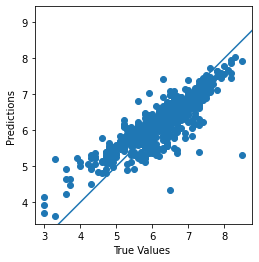

In [5]:
file = open(f"random_forest.obj", 'rb')
rf_model = pickle.load(file)
file.close()

prediction = rf_model.predict(X_test)

test_err = metrics.mean_squared_error(y_test, prediction)
r_sqared = metrics.r2_score(y_test, prediction)
print('Test subset (MSE) of random forest: ', test_err)
print('Test R^2 : ', r_sqared)


plt.scatter(y_test, prediction)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-100, 100], [-100, 100])


Test subset (MSE) of poly regression using ridge:  0.3175056876194303
Test R^2 :  0.6092324599770211


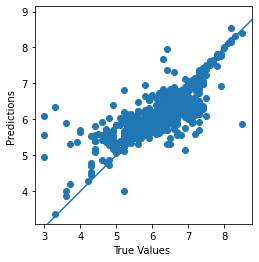

In [6]:
poly_features = PolynomialFeatures(degree=2)
file = open(f"ridge.obj", 'rb')
poly_with_reg = pickle.load(file)
file.close()

prediction = poly_with_reg.predict(poly_features.fit_transform(X_test))

test_err = metrics.mean_squared_error(y_test, prediction)
r_sqared = metrics.r2_score(y_test, prediction)
print('Test subset (MSE) of poly regression using ridge: ', test_err)
print('Test R^2 : ', r_sqared)


plt.scatter(y_test, prediction)
plt.xlabel('True Values ')
plt.ylabel('Predictions ')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-100, 100], [-100, 100])